In [ ]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn


In [ ]:
import pandas as pd
encodings = ['utf-8', 'latin1', 'iso-8859-1']

for encoding in encodings:
    try:
        df = pd.read_csv('/content/drive/MyDrive/NetflixOriginals.csv', encoding=encoding)
        print("CSV file read successfully with encoding:", encoding)
        break
    except UnicodeDecodeError:
        print("Error reading CSV file with encoding:", encoding)

df

Error reading CSV file with encoding: utf-8
CSV file read successfully with encoding: latin1


,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese


In [ ]:
print(df.shape)

(584, 6)


In [ ]:
df.describe()

,Runtime,IMDB Score
count,584.000000,584.000000
mean,93.577055,6.271747
std,27.761683,0.979256
min,4.000000,2.500000
25%,86.000000,5.700000
50%,97.000000,6.350000
75%,108.000000,7.000000
max,209.000000,9.000000


In [ ]:
df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


In [ ]:
df.isnull().sum().sort_values(ascending=False)

Title         0
Genre         0
Premiere      0
Runtime       0
IMDB Score    0
Language      0
dtype: int64

In [ ]:
df=df.dropna()
df

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese


In [ ]:
df.duplicated().any()

False

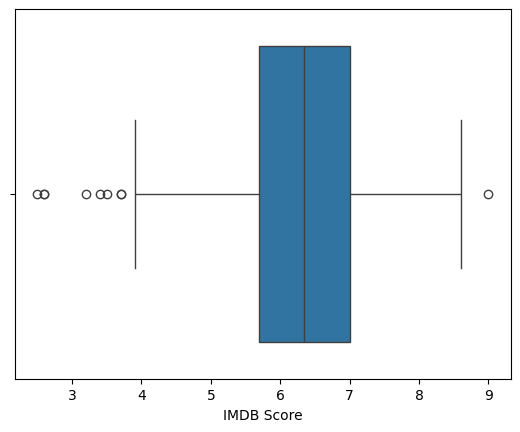

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
sns.boxplot(x=df['IMDB Score'])
plt.show()

In [ ]:
scaler = StandardScaler()
df['IMDB Scaled'] = scaler.fit_transform(df[['IMDB Score']])
df.head()


,Title,Genre,Premiere,Runtime,IMDB Score,Language,IMDB Scaled
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese,-3.854945
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish,-3.752740
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian,-3.752740
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English,-3.139505
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi,-2.935093


In [ ]:
print(df['IMDB Score'].skew())

-0.49136251913032913
